In [1]:
from ugropy import abdulelah_gani_p, instantiate_mol_object

import pandas as pd

import numpy as np

In [2]:
df = pd.read_csv("abdulelah_gani_frags/log_p.csv", index_col="SMILES", sep="|", comment="?")

In [3]:
# for idx, smiles in enumerate(df.index):
#     try:
#         solution = abdulelah_gani_p.get_groups(smiles, "smiles")
#         solution.subgroups_numbers
#     except:
#         print(smiles)
#         print(idx)
#         print(df.loc[smiles, "Compound"])
#         break

In [4]:
primary = np.linspace(1, 220, 220, dtype=int).astype(str)

In [5]:
df = df[primary]
df.rename(columns=lambda col: int(col) if col.isdigit() else col, inplace=True)

In [6]:
for idx, smiles in enumerate(df.index):
    solution = abdulelah_gani_p.get_groups(smiles, "smiles")
    
    # Filtrar las columnas de la fila que no sean iguales a 0
    row = df.loc[smiles][df.loc[smiles] != 0]
    
    # Convertir la fila filtrada a diccionario
    row_dict = row.to_dict()
    
    # Comparar con los subgrupos calculados
    if solution.subgroups_numbers != row_dict:
        print(smiles)
        print(idx)
        print(solution.subgroups)
        print(solution.subgroups_numbers)
        print(row_dict)
        
        wrong_smiles = smiles
        break


BrC1=CC2=C(S1)N3C(C)=NN=C3CN=C2c4ccccc4Cl
11
{'CH3': 1, 'aCH': 4, 'aC fused with non-aromatic ring': 1, 'aC-Cl': 1, '-Br except as above': 1, 'CH2 (cyclic)': 1, 'CH=C (cyclic)': 1, 'C=C (cyclic)': 1, 'N (cyclic)': 1, 'C=N (cyclic)': 3, 'S (cyclic)': 1}
{1: 1, 15: 4, 17: 1, 123: 1, 128: 1, 168: 1, 172: 1, 173: 1, 176: 1, 178: 3, 181: 1}
{1: 1, 15: 4, 18: 1, 123: 1, 128: 1, 168: 1, 172: 1, 173: 1, 176: 1, 178: 3, 181: 1}


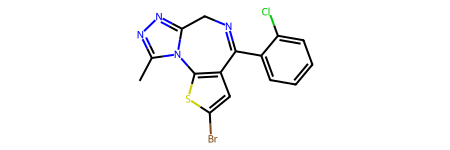

In [7]:
mol = instantiate_mol_object(wrong_smiles, "smiles")

mol

In [8]:
sol = abdulelah_gani_p.detect_fragments(mol)
 
sol

{'CH3_0': (8,),
 'aCH_0': (2,),
 'aCH_1': (16,),
 'aCH_2': (17,),
 'aCH_3': (18,),
 'aCH_4': (19,),
 'aC fused with aromatic ring_0': (4,),
 'aC fused with non-aromatic ring_0': (3,),
 'aC fused with non-aromatic ring_1': (11,),
 'aC fused with non-aromatic ring_2': (15,),
 'aC except as above_0': (1,),
 'aC except as above_1': (7,),
 'aC except as above_2': (20,),
 'aN in aromatic ring_0': (6,),
 'aN in aromatic ring_1': (9,),
 'aN in aromatic ring_2': (10,),
 'aC-CH3_0': (7, 8),
 'aC-Cl_0': (20, 21),
 '-Br except as above_0': (0,),
 '-Cl except as above_0': (21,),
 'CH2 (cyclic)_0': (12,),
 'CH=C (cyclic)_0': (2, 1),
 'CH=C (cyclic)_1': (2, 3),
 'C=C (cyclic)_0': (3, 4),
 'C=C (cyclic)_1': (3, 14),
 'N (cyclic)_0': (6,),
 'N (cyclic)_1': (9,),
 'N (cyclic)_2': (10,),
 'N (cyclic)_3': (13,),
 'C=N (cyclic)_0': (4, 6),
 'C=N (cyclic)_1': (7, 6),
 'C=N (cyclic)_2': (7, 9),
 'C=N (cyclic)_3': (11, 10),
 'C=N (cyclic)_4': (11, 6),
 'C=N (cyclic)_5': (14, 13),
 'S (cyclic)_0': (5,)}

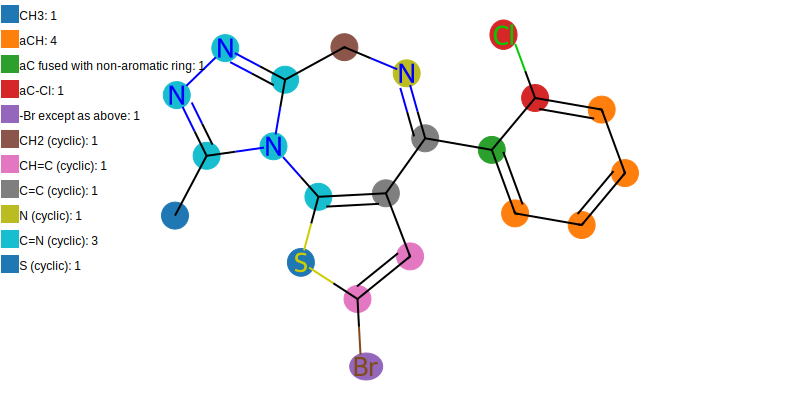

In [9]:
sol = abdulelah_gani_p.get_groups(wrong_smiles, "smiles")

sol.draw(width=800, height=400)

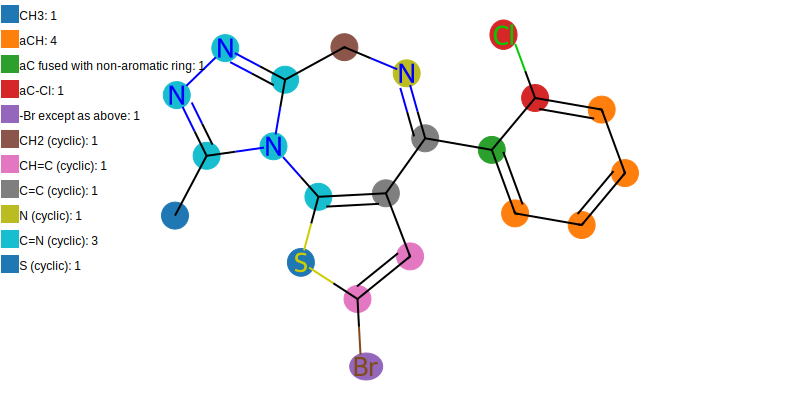

In [10]:
smiles="BrC1=CC2=C(S1)N3C(C)=NN=C3CN=C2c4ccccc4Cl"

mol = abdulelah_gani_p.get_groups(smiles, "smiles")

mol.draw(width=800, height=400)

In [11]:
df[df[207]>0][176]

SMILES
CCn1cc(C(=O)O)c(=O)c2cc(F)c(cc12)N3CCN(C)CC3        2
CCn1cc(C(=O)O)c(=O)c2cc(F)c(cc12)N3CCNC(C)C3        1
CCn1cc(C(=O)O)c(=O)c2cc(F)c(cc12)N3CCNCC3           1
CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCN(C)CC3)c(F)c12     2
CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNC(C)C3)c(F)c12     1
CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)c(F)c12        1
CCn1cc(C(=O)O)c(=O)c2cc(F)c(nc12)N3CCNCC3           1
CCn1cc(C(=O)O)c(=O)c2cc3OCOc3cc12                   0
CCn1cc(C(=O)O)c(=O)c2ccc(C)nc12                     0
CCn1cc(C(=O)O)c(=O)c2cnc(nc12)N3CCNCC3              1
CCn1cc(C(=O)OCOC(=O)C)c(=O)c2ccc(C)nc12             0
CN1CCN(CC1)c2c(F)cc3c(=O)c(cn4C(C)COc2c34)C(=O)O    2
Fc1cc2CCC(C)n3cc(C(=O)O)c(=O)c(c1)c23               0
FCCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCN(C)CC3)c(F)c12    2
O=c1ccn(C)c2ccccc12                                 0
O=c1n2C=CC=Cc2nc3ccccc13                            0
O=c1n2CCCCc2nc3ccccc13                              0
O=c1n2CCCCCc2nc3ccccc13                             0
Name: 176, dtype: int